# load mmm samples

In [1]:
%include "EnableIPythonDisplay.swift"

import TensorFlow
import PythonKit
import Foundation

let np = Python.import("numpy")
let plt = Python.import("matplotlib.pyplot")
IPythonDisplay.shell.enable_matplotlib("inline")

%include "Sources/MotionDataset/MotionFrame.swift"
%include "Sources/MotionDataset/MotionSample.swift"
%include "Sources/MotionDataset/MotionDataset.swift"

In [ ]:
// TODO: create api for saving the image

# test min/max of two samples

In [66]:
let mmmURL = URL(fileURLWithPath: "/notebooks/m2l.gt/data/2017-06-22/00186_mmm.xml")
let annotationsURL = URL(fileURLWithPath: "/notebooks/m2l.gt/data/2017-06-22/00186_annotations.json")
let m186 = MotionSample(sampleID: 186, mmmURL: mmmURL, annotationsURL: annotationsURL)
print(m186.describe())
print(m186.annotations)

MotionSample(timestamp: 7.79, motions: 780, annotations: 2)
["a person walks a circle", "Subject walks in a circle counterclockwise."]


In [67]:
let mmmURL = URL(fileURLWithPath: "/notebooks/m2l.gt/data/2017-06-22/00187_mmm.xml")
let annotationsURL = URL(fileURLWithPath: "/notebooks/m2l.gt/data/2017-06-22/00187_annotations.json")
let m187 = MotionSample(sampleID: 187, mmmURL: mmmURL, annotationsURL: annotationsURL)
print(m187.describe())
print(m187.annotations)

MotionSample(timestamp: 7.65, motions: 766, annotations: 1)
["A person walking in a circle to the left."]


In [76]:
let jp186 = np.array(m186.getJointPositions(grouppedJoints: false))
let gjp186 = np.array(m186.getJointPositions(grouppedJoints: true))

In [77]:
let jp187 = np.array(m187.getJointPositions(grouppedJoints: false))
let gjp187 = np.array(m187.getJointPositions(grouppedJoints: true))

In [73]:
jp186.shape

(780, 44)


In [74]:
(np.amin(jp186), np.amax(jp186))

▿ 2 elements
  - .0 : -1.1852200031280518
  - .1 : 0.8964220285415649


In [78]:
(np.amin(gjp186), np.amax(gjp186))

▿ 2 elements
  - .0 : -1.322192907333374
  - .1 : 0.9793360233306885


In [75]:
(np.amin(jp187), np.amax(jp187))

▿ 2 elements
  - .0 : -1.1613099575042725
  - .1 : 1.5707999467849731


In [79]:
(np.amin(gjp187), np.amax(gjp187))

▿ 2 elements
  - .0 : -1.5440030097961426
  - .1 : 1.0199240446090698


In [ ]:
// + load few hundred samples
// + get all numbers
// + get min/max

In [ ]:
// print(motionSample.annotations)

In [ ]:
// TODO: create class that converts dataset to png
// TODO: use original sample numbers from Plappert dataset

In [128]:
let datasetFolderURL = URL(fileURLWithPath: "/notebooks/m2l.gt/data/2017-06-22/")

let date = Date()
var motionDataset = MotionDataset(datasetFolderURL: datasetFolderURL, maxSamples: 2000)
print(abs(date.timeIntervalSinceNow))

Sample 1, 00001_mmm.xml, 00001_annotations.json
Sample 2, 00002_mmm.xml, 00002_annotations.json
Sample 3, 00003_mmm.xml, 00003_annotations.json
Sample 4, 00004_mmm.xml, 00004_annotations.json
Sample 5, 00005_mmm.xml, 00005_annotations.json
Sample 6, 00006_mmm.xml, 00006_annotations.json
Sample 7, 00007_mmm.xml, 00007_annotations.json
Sample 8, 00008_mmm.xml, 00008_annotations.json
Sample 9, 00009_mmm.xml, 00009_annotations.json
Sample 10, 00010_mmm.xml, 00010_annotations.json
Sample 11, 00011_mmm.xml, 00011_annotations.json
Sample 12, 00012_mmm.xml, 00012_annotations.json
** Sample 12 doesn't exist.
Sample 13, 00013_mmm.xml, 00013_annotations.json
Sample 14, 00014_mmm.xml, 00014_annotations.json
Sample 15, 00015_mmm.xml, 00015_annotations.json
Sample 16, 00016_mmm.xml, 00016_annotations.json
Sample 17, 00017_mmm.xml, 00017_annotations.json
Sample 18, 00018_mmm.xml, 00018_annotations.json
Sample 19, 00019_mmm.xml, 00019_annotations.json
Sample 20, 00020_mmm.xml, 00020_annotations.json
S

Sample 168, 00168_mmm.xml, 00168_annotations.json
Sample 169, 00169_mmm.xml, 00169_annotations.json
Sample 170, 00170_mmm.xml, 00170_annotations.json
Sample 171, 00171_mmm.xml, 00171_annotations.json
Sample 172, 00172_mmm.xml, 00172_annotations.json
Sample 173, 00173_mmm.xml, 00173_annotations.json
Sample 174, 00174_mmm.xml, 00174_annotations.json
Sample 175, 00175_mmm.xml, 00175_annotations.json
Sample 176, 00176_mmm.xml, 00176_annotations.json
Sample 177, 00177_mmm.xml, 00177_annotations.json
Sample 178, 00178_mmm.xml, 00178_annotations.json
Sample 179, 00179_mmm.xml, 00179_annotations.json
Sample 180, 00180_mmm.xml, 00180_annotations.json
Sample 181, 00181_mmm.xml, 00181_annotations.json
Sample 182, 00182_mmm.xml, 00182_annotations.json
Sample 183, 00183_mmm.xml, 00183_annotations.json
Sample 184, 00184_mmm.xml, 00184_annotations.json
Sample 185, 00185_mmm.xml, 00185_annotations.json
Sample 186, 00186_mmm.xml, 00186_annotations.json
Sample 187, 00187_mmm.xml, 00187_annotations.json


Sample 331, 00331_mmm.xml, 00331_annotations.json
Sample 332, 00332_mmm.xml, 00332_annotations.json
Sample 333, 00333_mmm.xml, 00333_annotations.json
Sample 334, 00334_mmm.xml, 00334_annotations.json
Sample 335, 00335_mmm.xml, 00335_annotations.json
Sample 336, 00336_mmm.xml, 00336_annotations.json
Sample 337, 00337_mmm.xml, 00337_annotations.json
Sample 338, 00338_mmm.xml, 00338_annotations.json
Sample 339, 00339_mmm.xml, 00339_annotations.json
Sample 340, 00340_mmm.xml, 00340_annotations.json
Sample 341, 00341_mmm.xml, 00341_annotations.json
Sample 342, 00342_mmm.xml, 00342_annotations.json
Sample 343, 00343_mmm.xml, 00343_annotations.json
Sample 344, 00344_mmm.xml, 00344_annotations.json
Sample 345, 00345_mmm.xml, 00345_annotations.json
Sample 346, 00346_mmm.xml, 00346_annotations.json
Sample 347, 00347_mmm.xml, 00347_annotations.json
Sample 348, 00348_mmm.xml, 00348_annotations.json
Sample 349, 00349_mmm.xml, 00349_annotations.json
Sample 350, 00350_mmm.xml, 00350_annotations.json


Sample 496, 00496_mmm.xml, 00496_annotations.json
Sample 497, 00497_mmm.xml, 00497_annotations.json
Sample 498, 00498_mmm.xml, 00498_annotations.json
Sample 499, 00499_mmm.xml, 00499_annotations.json
Sample 500, 00500_mmm.xml, 00500_annotations.json
Sample 501, 00501_mmm.xml, 00501_annotations.json
Sample 502, 00502_mmm.xml, 00502_annotations.json
Sample 503, 00503_mmm.xml, 00503_annotations.json
Sample 504, 00504_mmm.xml, 00504_annotations.json
Sample 505, 00505_mmm.xml, 00505_annotations.json
Sample 506, 00506_mmm.xml, 00506_annotations.json
Sample 507, 00507_mmm.xml, 00507_annotations.json
Sample 508, 00508_mmm.xml, 00508_annotations.json
Sample 509, 00509_mmm.xml, 00509_annotations.json
Sample 510, 00510_mmm.xml, 00510_annotations.json
Sample 511, 00511_mmm.xml, 00511_annotations.json
Sample 512, 00512_mmm.xml, 00512_annotations.json
Sample 513, 00513_mmm.xml, 00513_annotations.json
Sample 514, 00514_mmm.xml, 00514_annotations.json
Sample 515, 00515_mmm.xml, 00515_annotations.json


Sample 661, 00661_mmm.xml, 00661_annotations.json
Sample 662, 00662_mmm.xml, 00662_annotations.json
Sample 663, 00663_mmm.xml, 00663_annotations.json
Sample 664, 00664_mmm.xml, 00664_annotations.json
Sample 665, 00665_mmm.xml, 00665_annotations.json
Sample 666, 00666_mmm.xml, 00666_annotations.json
Sample 667, 00667_mmm.xml, 00667_annotations.json
Sample 668, 00668_mmm.xml, 00668_annotations.json
Sample 669, 00669_mmm.xml, 00669_annotations.json
Sample 670, 00670_mmm.xml, 00670_annotations.json
Sample 671, 00671_mmm.xml, 00671_annotations.json
Sample 672, 00672_mmm.xml, 00672_annotations.json
Sample 673, 00673_mmm.xml, 00673_annotations.json
Sample 674, 00674_mmm.xml, 00674_annotations.json
Sample 675, 00675_mmm.xml, 00675_annotations.json
Sample 676, 00676_mmm.xml, 00676_annotations.json
Sample 677, 00677_mmm.xml, 00677_annotations.json
Sample 678, 00678_mmm.xml, 00678_annotations.json
Sample 679, 00679_mmm.xml, 00679_annotations.json
Sample 680, 00680_mmm.xml, 00680_annotations.json


Sample 825, 00825_mmm.xml, 00825_annotations.json
Sample 826, 00826_mmm.xml, 00826_annotations.json
Sample 827, 00827_mmm.xml, 00827_annotations.json
Sample 828, 00828_mmm.xml, 00828_annotations.json
Sample 829, 00829_mmm.xml, 00829_annotations.json
Sample 830, 00830_mmm.xml, 00830_annotations.json
Sample 831, 00831_mmm.xml, 00831_annotations.json
Sample 832, 00832_mmm.xml, 00832_annotations.json
Sample 833, 00833_mmm.xml, 00833_annotations.json
Sample 834, 00834_mmm.xml, 00834_annotations.json
Sample 835, 00835_mmm.xml, 00835_annotations.json
Sample 836, 00836_mmm.xml, 00836_annotations.json
Sample 837, 00837_mmm.xml, 00837_annotations.json
Sample 838, 00838_mmm.xml, 00838_annotations.json
Sample 839, 00839_mmm.xml, 00839_annotations.json
Sample 840, 00840_mmm.xml, 00840_annotations.json
Sample 841, 00841_mmm.xml, 00841_annotations.json
Sample 842, 00842_mmm.xml, 00842_annotations.json
Sample 843, 00843_mmm.xml, 00843_annotations.json
Sample 844, 00844_mmm.xml, 00844_annotations.json


Sample 991, 00991_mmm.xml, 00991_annotations.json
Sample 992, 00992_mmm.xml, 00992_annotations.json
Sample 993, 00993_mmm.xml, 00993_annotations.json
Sample 994, 00994_mmm.xml, 00994_annotations.json
Sample 995, 00995_mmm.xml, 00995_annotations.json
Sample 996, 00996_mmm.xml, 00996_annotations.json
Sample 997, 00997_mmm.xml, 00997_annotations.json
Sample 998, 00998_mmm.xml, 00998_annotations.json
Sample 999, 00999_mmm.xml, 00999_annotations.json
Sample 1000, 01000_mmm.xml, 01000_annotations.json
Sample 1001, 01001_mmm.xml, 01001_annotations.json
Sample 1002, 01002_mmm.xml, 01002_annotations.json
Sample 1003, 01003_mmm.xml, 01003_annotations.json
Sample 1004, 01004_mmm.xml, 01004_annotations.json
Sample 1005, 01005_mmm.xml, 01005_annotations.json
Sample 1006, 01006_mmm.xml, 01006_annotations.json
Sample 1007, 01007_mmm.xml, 01007_annotations.json
Sample 1008, 01008_mmm.xml, 01008_annotations.json
Sample 1009, 01009_mmm.xml, 01009_annotations.json
Sample 1010, 01010_mmm.xml, 01010_annota

Sample 1153, 01153_mmm.xml, 01153_annotations.json
Sample 1154, 01154_mmm.xml, 01154_annotations.json
Sample 1155, 01155_mmm.xml, 01155_annotations.json
Sample 1156, 01156_mmm.xml, 01156_annotations.json
Sample 1157, 01157_mmm.xml, 01157_annotations.json
Sample 1158, 01158_mmm.xml, 01158_annotations.json
Sample 1159, 01159_mmm.xml, 01159_annotations.json
Sample 1160, 01160_mmm.xml, 01160_annotations.json
Sample 1161, 01161_mmm.xml, 01161_annotations.json
Sample 1162, 01162_mmm.xml, 01162_annotations.json
Sample 1163, 01163_mmm.xml, 01163_annotations.json
Sample 1164, 01164_mmm.xml, 01164_annotations.json
Sample 1165, 01165_mmm.xml, 01165_annotations.json
Sample 1166, 01166_mmm.xml, 01166_annotations.json
Sample 1167, 01167_mmm.xml, 01167_annotations.json
Sample 1168, 01168_mmm.xml, 01168_annotations.json
Sample 1169, 01169_mmm.xml, 01169_annotations.json
Sample 1170, 01170_mmm.xml, 01170_annotations.json
Sample 1171, 01171_mmm.xml, 01171_annotations.json
Sample 1172, 01172_mmm.xml, 011

Sample 1314, 01314_mmm.xml, 01314_annotations.json
Sample 1315, 01315_mmm.xml, 01315_annotations.json
Sample 1316, 01316_mmm.xml, 01316_annotations.json
Sample 1317, 01317_mmm.xml, 01317_annotations.json
Sample 1318, 01318_mmm.xml, 01318_annotations.json
Sample 1319, 01319_mmm.xml, 01319_annotations.json
Sample 1320, 01320_mmm.xml, 01320_annotations.json
Sample 1321, 01321_mmm.xml, 01321_annotations.json
Sample 1322, 01322_mmm.xml, 01322_annotations.json
Sample 1323, 01323_mmm.xml, 01323_annotations.json
Sample 1324, 01324_mmm.xml, 01324_annotations.json
Sample 1325, 01325_mmm.xml, 01325_annotations.json
Sample 1326, 01326_mmm.xml, 01326_annotations.json
Sample 1327, 01327_mmm.xml, 01327_annotations.json
Sample 1328, 01328_mmm.xml, 01328_annotations.json
Sample 1329, 01329_mmm.xml, 01329_annotations.json
Sample 1330, 01330_mmm.xml, 01330_annotations.json
Sample 1331, 01331_mmm.xml, 01331_annotations.json
Sample 1332, 01332_mmm.xml, 01332_annotations.json
Sample 1333, 01333_mmm.xml, 013

Sample 1476, 01476_mmm.xml, 01476_annotations.json
Sample 1477, 01477_mmm.xml, 01477_annotations.json
Sample 1478, 01478_mmm.xml, 01478_annotations.json
Sample 1479, 01479_mmm.xml, 01479_annotations.json
Sample 1480, 01480_mmm.xml, 01480_annotations.json
Sample 1481, 01481_mmm.xml, 01481_annotations.json
Sample 1482, 01482_mmm.xml, 01482_annotations.json
Sample 1483, 01483_mmm.xml, 01483_annotations.json
Sample 1484, 01484_mmm.xml, 01484_annotations.json
Sample 1485, 01485_mmm.xml, 01485_annotations.json
Sample 1486, 01486_mmm.xml, 01486_annotations.json
Sample 1487, 01487_mmm.xml, 01487_annotations.json
Sample 1488, 01488_mmm.xml, 01488_annotations.json
Sample 1489, 01489_mmm.xml, 01489_annotations.json
Sample 1490, 01490_mmm.xml, 01490_annotations.json
Sample 1491, 01491_mmm.xml, 01491_annotations.json
Sample 1492, 01492_mmm.xml, 01492_annotations.json
Sample 1493, 01493_mmm.xml, 01493_annotations.json
Sample 1494, 01494_mmm.xml, 01494_annotations.json
Sample 1495, 01495_mmm.xml, 014

Sample 1626, 01626_mmm.xml, 01626_annotations.json
Sample 1627, 01627_mmm.xml, 01627_annotations.json
Sample 1628, 01628_mmm.xml, 01628_annotations.json
Sample 1629, 01629_mmm.xml, 01629_annotations.json
Sample 1630, 01630_mmm.xml, 01630_annotations.json
Sample 1631, 01631_mmm.xml, 01631_annotations.json
Sample 1632, 01632_mmm.xml, 01632_annotations.json
Sample 1633, 01633_mmm.xml, 01633_annotations.json
Sample 1634, 01634_mmm.xml, 01634_annotations.json
Sample 1635, 01635_mmm.xml, 01635_annotations.json
Sample 1636, 01636_mmm.xml, 01636_annotations.json
Sample 1637, 01637_mmm.xml, 01637_annotations.json
Sample 1638, 01638_mmm.xml, 01638_annotations.json
Sample 1639, 01639_mmm.xml, 01639_annotations.json
Sample 1640, 01640_mmm.xml, 01640_annotations.json
Sample 1641, 01641_mmm.xml, 01641_annotations.json
Sample 1642, 01642_mmm.xml, 01642_annotations.json
Sample 1643, 01643_mmm.xml, 01643_annotations.json
Sample 1644, 01644_mmm.xml, 01644_annotations.json
Sample 1645, 01645_mmm.xml, 016

Sample 1788, 01788_mmm.xml, 01788_annotations.json
Sample 1789, 01789_mmm.xml, 01789_annotations.json
Sample 1790, 01790_mmm.xml, 01790_annotations.json
Sample 1791, 01791_mmm.xml, 01791_annotations.json
Sample 1792, 01792_mmm.xml, 01792_annotations.json
Sample 1793, 01793_mmm.xml, 01793_annotations.json
Sample 1794, 01794_mmm.xml, 01794_annotations.json
Sample 1795, 01795_mmm.xml, 01795_annotations.json
Sample 1796, 01796_mmm.xml, 01796_annotations.json
Sample 1797, 01797_mmm.xml, 01797_annotations.json
Sample 1798, 01798_mmm.xml, 01798_annotations.json
Sample 1799, 01799_mmm.xml, 01799_annotations.json
Sample 1800, 01800_mmm.xml, 01800_annotations.json
Sample 1801, 01801_mmm.xml, 01801_annotations.json
Sample 1802, 01802_mmm.xml, 01802_annotations.json
Sample 1803, 01803_mmm.xml, 01803_annotations.json
Sample 1804, 01804_mmm.xml, 01804_annotations.json
Sample 1805, 01805_mmm.xml, 01805_annotations.json
Sample 1806, 01806_mmm.xml, 01806_annotations.json
Sample 1807, 01807_mmm.xml, 018

Sample 1950, 01950_mmm.xml, 01950_annotations.json
Sample 1951, 01951_mmm.xml, 01951_annotations.json
Sample 1952, 01952_mmm.xml, 01952_annotations.json
Sample 1953, 01953_mmm.xml, 01953_annotations.json
Sample 1954, 01954_mmm.xml, 01954_annotations.json
Sample 1955, 01955_mmm.xml, 01955_annotations.json
Sample 1956, 01956_mmm.xml, 01956_annotations.json
Sample 1957, 01957_mmm.xml, 01957_annotations.json
Sample 1958, 01958_mmm.xml, 01958_annotations.json
Sample 1959, 01959_mmm.xml, 01959_annotations.json
Sample 1960, 01960_mmm.xml, 01960_annotations.json
Sample 1961, 01961_mmm.xml, 01961_annotations.json
Sample 1962, 01962_mmm.xml, 01962_annotations.json
Sample 1963, 01963_mmm.xml, 01963_annotations.json
Sample 1964, 01964_mmm.xml, 01964_annotations.json
Sample 1965, 01965_mmm.xml, 01965_annotations.json
Sample 1966, 01966_mmm.xml, 01966_annotations.json
Sample 1967, 01967_mmm.xml, 01967_annotations.json
Sample 1968, 01968_mmm.xml, 01968_annotations.json
Sample 1969, 01969_mmm.xml, 019

In [129]:
print(motionDataset.describe())

MotionDataset(motionSamples: 1972)


In [ ]:
// TODO: pad/clip motions to maxTimestep

In [ ]:
// longest sequence

In [130]:
let max_ms = Int(np.amax(motionDataset.motionSamples.map { $0.motionFrames.count }))!
max_ms

2349


In [113]:
func paddedShapedArray(motionSample: MotionSample, padding: Int, grouppedJoints: Bool) -> ShapedArray<Float> {
    let an_array = np.array(motionSample.getJointPositions(grouppedJoints: grouppedJoints))
    // https://kite.com/python/answers/how-to-pad-a-numpy-array-with-zeroes-in-python
    let shape = np.shape(an_array)
    let pythonTuple = Python.tuple([PythonObject(padding), shape[1]])
    var padded_array = np.zeros(pythonTuple)
    padded_array[0..<shape[0],0..<shape[1]] = an_array
    return ShapedArray<Float>(numpy: (padded_array as! PythonObject).astype(np.float32))!
}

In [132]:
let all_jp = motionDataset.motionSamples.map { 
    paddedShapedArray(motionSample: $0, padding: max_ms, grouppedJoints: false)
}

In [133]:
all_jp.count

1972


In [134]:
let all_jp_arr = np.stack(all_jp.map { $0.makeNumpyArray()})
all_jp_arr.shape

(1972, 2349, 44)


In [135]:
(np.amin(all_jp_arr), np.amax(all_jp_arr))

▿ 2 elements
  - .0 : -2.79253
  - .1 : 3.31613


In [136]:
np.sum(all_jp_arr)

1519415.5


In [137]:
let all_gjp = motionDataset.motionSamples.map { 
    paddedShapedArray(motionSample: $0, padding: max_ms, grouppedJoints: true)
}

In [138]:
let all_gjp_arr = np.stack(all_gjp.map { $0.makeNumpyArray()})
all_gjp_arr.shape

(1972, 2349, 44)


In [139]:
(np.amin(all_gjp_arr), np.amax(all_gjp_arr))

▿ 2 elements
  - .0 : -3.665195
  - .1 : 4.6486


In [140]:
np.sum(all_gjp_arr)

3275222.2


In [146]:
-softplus(-Tensor<Float>([1.0, 2.0, 4.0]))

[-0.31326166, -0.12692805, -0.01814996]


In [144]:
logSigmoid(Tensor<Float>([1.0, 2.0, 4.0]))

[-0.31326166, -0.12692805, -0.01814996]


In [150]:
sigmoid(Tensor<Float>([-4.0, 0, 1.0, 2.0, 4.0]))

[0.017986238,         0.5,   0.7310586,   0.8807971,  0.98201376]


In [154]:
let x = np.array([-4.0, 0, 1.0, 2.0, 4.0]).astype(np.float32)
let z = 1/(1 + np.exp(-x))
z

[0.01798621 0.5        0.7310586  0.880797   0.98201376]


# visualize sample

In [172]:
func plotMotionSample(motionSample: MotionSample, grouppedJoints: Bool) {
    // let time = np.array(motionSample.motionFrames.map {$0.timestamp})
    var position = np.array(motionSample.getJointPositions(grouppedJoints: grouppedJoints))
    print(np.sum(position))
    position = 1/(1 + np.exp(-position)) // sigmoid
    print(np.sum(position))
    
    let x = plt.subplots()
    // let fig = x[0]
    let ax = x[1]
    let norm = plt.Normalize(vmin:0.0, vmax:1.0, clip:true)
    ax.imshow(position.T, interpolation: "nearest", extent: [0, 3, 0, 3], cmap: "viridis", norm: norm)
    ax.axis("off")
    ax.set_title("\(motionSample.describe()) \(motionSample.annotations[0])")

    plt.show()
}
// plotMotionSample(motionSample: motionSample, grouppedJoints: false)

1294.8548011436833
17479.6770161362


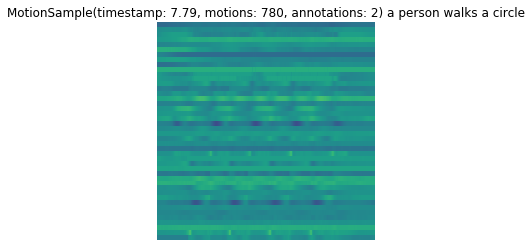

In [173]:
plotMotionSample(motionSample: m186, grouppedJoints: false)

996.8304044375946
17411.982085525302


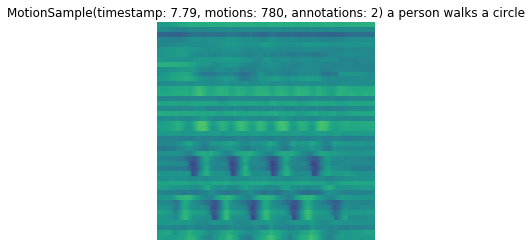

In [174]:
plotMotionSample(motionSample: m186, grouppedJoints: true)

# visualize groupped joints

# save pngs

In [167]:
func saveMotionSampleImage(pngURL: URL, motionSample: MotionSample, grouppedJoints: Bool, show: Bool) {
    var position = np.array(motionSample.getJointPositions(grouppedJoints: grouppedJoints))
    position = 1/(1 + np.exp(-position)) // sigmoid
    
    let fig = plt.figure()
    fig.set_size_inches([1, 1])
    
    let ax = plt.Axes(fig, [0, 0, 1, 1])
    let norm = plt.Normalize(vmin:0.0, vmax:1.0, clip:true)
    ax.imshow(position.T, interpolation: "nearest", extent: [0, 1, 0, 1], cmap: "viridis", norm: norm)
    ax.axis("off")
    fig.add_axes(ax)

    plt.savefig(pngURL.path, dpi: 224)
    if (show) {
        plt.show()
    }
    plt.close(fig)
}
// let outputPath = URL(fileURLWithPath:"/notebooks/m2l.gt/data/output/image00001.png")
// saveMotionSampleImage(pngURL: outputPath, motionSample: motionSample, grouppedJoints: true, show: false)

In [160]:
// TODO: output labels
// TODO: refactor

In [176]:
let date = Date()
// output_non-groupped, grouppedJoints: false
// output, grouppedJoints: true
let pngFolderURL = URL(fileURLWithPath: "/notebooks/m2l.gt/data/output_non-groupped_sigmoid/")
let maxSamples = motionDataset.motionSamples.count
for i in 0..<200 {
    let motionSample = motionDataset.motionSamples[i]
    let pngFilename = String(format: "%05d.png", motionSample.sampleID)
    let pngURL = pngFolderURL.appendingPathComponent(pngFilename)
    print(motionSample.describe())
    saveMotionSampleImage(pngURL: pngURL, motionSample: motionSample, grouppedJoints: false, show: false)
}

print(abs(date.timeIntervalSinceNow))

MotionSample(timestamp: 3.77, motions: 378, annotations: 1)
MotionSample(timestamp: 5.3, motions: 531, annotations: 1)
MotionSample(timestamp: 5.68, motions: 569, annotations: 1)
MotionSample(timestamp: 5.65, motions: 566, annotations: 2)
MotionSample(timestamp: 5.88, motions: 589, annotations: 1)
MotionSample(timestamp: 6.15, motions: 616, annotations: 2)
MotionSample(timestamp: 5.79, motions: 580, annotations: 2)
MotionSample(timestamp: 6.19, motions: 620, annotations: 1)
MotionSample(timestamp: 6.29, motions: 630, annotations: 3)
MotionSample(timestamp: 6.23, motions: 624, annotations: 1)
MotionSample(timestamp: 5.5, motions: 551, annotations: 2)
MotionSample(timestamp: 5.65, motions: 566, annotations: 1)
MotionSample(timestamp: 5.43, motions: 544, annotations: 1)
MotionSample(timestamp: 5.87, motions: 588, annotations: 1)
MotionSample(timestamp: 5.39, motions: 540, annotations: 9)
MotionSample(timestamp: 4.4, motions: 441, annotations: 3)
MotionSample(timestamp: 5.51, motions: 552,

MotionSample(timestamp: 5.35, motions: 536, annotations: 4)
MotionSample(timestamp: 5.98, motions: 599, annotations: 3)
MotionSample(timestamp: 5.39, motions: 540, annotations: 3)
MotionSample(timestamp: 5.34, motions: 535, annotations: 1)
MotionSample(timestamp: 5.11, motions: 512, annotations: 3)
MotionSample(timestamp: 5.13, motions: 514, annotations: 12)
MotionSample(timestamp: 5.49, motions: 550, annotations: 2)
MotionSample(timestamp: 5.22, motions: 523, annotations: 3)
MotionSample(timestamp: 5.46, motions: 547, annotations: 2)
MotionSample(timestamp: 5.22, motions: 523, annotations: 2)
MotionSample(timestamp: 5.56, motions: 557, annotations: 1)
MotionSample(timestamp: 5.43, motions: 544, annotations: 3)
MotionSample(timestamp: 5.36, motions: 537, annotations: 3)
MotionSample(timestamp: 5.24, motions: 525, annotations: 2)
MotionSample(timestamp: 5.03, motions: 504, annotations: 2)
MotionSample(timestamp: 5.64, motions: 565, annotations: 2)
MotionSample(timestamp: 4.97, motions: 

In [ ]:
// TODO: check is_moving flag values - will need after padding